In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# üìå Extrac√£o

In [116]:
# Carregar o JSON
dados_clientes = pd.read_json('/content/TelecomX_Data.json')
dados_clientes

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [117]:
# Criar um DataFrame base com apenas customerID e Churn
df_base = dados_clientes[['customerID', 'Churn']].copy()

In [118]:
# Normalizar colunas aninhadas e adicionar o customerID a cada uma
df_norm_customer = pd.json_normalize(dados_clientes['customer'])
df_norm_phone    = pd.json_normalize(dados_clientes['phone'])
df_norm_internet = pd.json_normalize(dados_clientes['internet'])
df_norm_account  = pd.json_normalize(dados_clientes['account'])

# Concatenar tudo com a coluna customerID
df_normalizado = pd.concat([df_base, df_norm_customer, df_norm_phone, df_norm_internet, df_norm_account], axis=1)

# Visualizar o DataFrame final
df_normalizado.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [119]:
# Visualiza o nome das colunas do DataFrame
print(df_normalizado.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


# üìå Transforma√ß√£o

In [120]:
# Ver estrutura do DataFrame
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [121]:
# Conferir tipos
df_normalizado.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [122]:
# Vis√£o geral r√°pida
df_normalizado.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

## Avaliando as colunas categ√≥ricas

In [123]:
# Verifica e imprime os dados existentes nas colunas categ√≥ricas
for col in ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']:
    print(f"{col}: {df_normalizado[col].unique()}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [124]:
# Para ver colunas categ√≥ricas e frequ√™ncias
df_normalizado.describe(include='object')

customerID Churn gender Partner Dependents PhoneService MultipleLines  \
count         7267  7267   7267    7267       7267         7267          7267   
unique        7267     3      2       2          2            2             3   
top     9995-HOTOH    No   Male      No         No          Yes            No   
freq             1  5174   3675    3749       5086         6560          3495   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7267           7267         7267             7267   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3198           3608         3182             3195   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7267        7267            7267            7267   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3582        2896            2870            4005   

       PaperlessBilling     PaymentMethod Charges.Total  
count              7267              7267          7267  
unique                2                 4          6531  
top                 Yes  Electronic check          20.2  
freq               4311              2445            11

In [125]:
# Convertendo para booleano
binarias = ['Churn']
for col in binarias:
    df_normalizado[col] = df_normalizado[col].map({'Yes': True, 'No': False})

## Avaliando as colunas num√©ricas

In [126]:
# Apenas para colunas num√©ricas
df_normalizado.describe()

SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000

In [127]:
# Verificar colunas com valores nulos
df_normalizado.isnull().sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64

In [128]:
# Convertendo colunas de valores monet√°rios, se vieram como string
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

# Conferindo se causou nulos ap√≥s convers√£o
df_normalizado[['Charges.Total']].isnull().sum()

Charges.Total    11
dtype: int64

In [129]:
df_normalizado[df_normalizado['Charges.Total'].isnull()]

customerID  Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ  False  Female              0     Yes        Yes       0   
1775  2520-SGTTA  False  Female              0     Yes        Yes       0   
1955  2775-SEFEE  False    Male              0      No        Yes       0   
2075  2923-ARZLG  False    Male              0     Yes        Yes       0   
2232  3115-CZMZD  False    Male              0      No        Yes       0   
2308  3213-VVOLG  False    Male              0     Yes        Yes       0   
2930  4075-WKNIU  False  Female              0     Yes        Yes       0   
3134  4367-NUYAO  False    Male              0     Yes        Yes       0   
3203  4472-LVYGI  False  Female              0     Yes        Yes       0   
4169  5709-LVOEQ  False  Female              0     Yes        Yes       0   
5599  7644-OMVMY  False    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
975            No  No phone service             DSL  ...                  Yes   
1775          Yes                No              No  ...  No internet service   
1955          Yes               Yes             DSL  ...                  Yes   
2075          Yes                No              No  ...  No internet service   
2232          Yes                No              No  ...  No internet service   
2308          Yes               Yes              No  ...  No internet service   
2930          Yes               Yes             DSL  ...                  Yes   
3134          Yes               Yes              No  ...  No internet service   
3203           No  No phone service             DSL  ...                   No   
4169          Yes                No             DSL  ...                  Yes   
5599          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
975                   Yes                  Yes                  Yes   
1775  No internet service  No internet service  No internet service   
1955                   No                  Yes                   No   
2075  No internet service  No internet service  No internet service   
2232  No internet service  No internet service  No internet service   
2308  No internet service  No internet service  No internet service   
2930                  Yes                  Yes                  Yes   
3134  No internet service  No internet service  No internet service   
3203                  Yes                  Yes                  Yes   
4169                  Yes                   No                  Yes   
5599  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
975                    No  Two year               No   
1775  No internet service  Two year               No   
1955                   No  Two year              Yes   
2075  No internet service  One year              Yes   
2232  No internet service  Two year               No   
2308  No internet service  Two year               No   
2930                   No  Two year               No   
3134  No internet service  Two year               No   
3203                   No  Two year              Yes   
4169                  Yes  Two year               No   
5599  No internet service  Two year               No   

                  PaymentMethod Charges.Monthly  Charges.Total  
975     Credit card (automatic)           56.05            NaN  
1775               Mailed check           20.00            NaN  
1955  Bank transfer (automatic)           61.90            NaN  
2075               Mailed check           19.70            NaN  
2232               Mailed check           20.25            NaN  
2308               Mailed check           25.35            NaN  
2930               Mailed check           73.35            NaN  
3134               Mailed check           25.75            NaN

In [130]:
# Atualizando dados vazios em Charges total para 0
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(0)

In [131]:
# Verificando duplicatas
df_normalizado.duplicated().sum()

np.int64(0)

In [132]:
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in colunas_binarias:
    print(f'{col}: {df_normalizado[col].unique()}')

Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
PaperlessBilling: ['Yes' 'No']
Churn: [False True nan]


In [133]:
# Verificar os valores √∫nicos da coluna Churn
df_normalizado['Churn'].value_counts(dropna=False)

Churn
False    5174
True     1869
NaN       224
Name: count, dtype: int64

In [134]:
# Substituir strings vazias por NaN
import numpy as np

df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)

# Verificar quantos valores ausentes ficaram
df_normalizado['Churn'].isnull().sum()

np.int64(224)

In [135]:
# Remover registros com Churn nulo (Como a an√°lise principal √© nesse item, dados ausentes nesse campo ser√£o desconsiderados)
df_normalizado = df_normalizado.dropna(subset=['Churn'])

In [136]:
# Verificar os valores √∫nicos da coluna Churn
df_normalizado['Churn'].value_counts(dropna=False)

Churn
False    5174
True     1869
Name: count, dtype: int64

In [137]:
# Checando poss√≠vel inconsist√™ncia de Charges total = 0 e Tenure > 0
inconsistentes = df_normalizado[(df_normalizado['Charges.Total'] == 0) & (df_normalizado['tenure'] > 0)]

inconsistentes.head()

print(f"Total de registros inconsistentes: {len(inconsistentes)}")

Total de registros inconsistentes: 0


In [138]:
df_normalizado['Contas_Diarias'] = df_normalizado['Charges.Monthly'] / 30

In [139]:
df_normalizado[['Charges.Monthly', 'Contas_Diarias']].head()

Charges.Monthly  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667

In [140]:
# Deixando 2 casas decimais
df_normalizado['Contas_Diarias'] = df_normalizado['Contas_Diarias'].round(2)

In [141]:
# Renomear colunas para nomes em portugu√™s
df_normalizado.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Parceiro',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Filmes_Streaming',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Forma_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
}, inplace=True)

In [142]:
# Dicion√°rio de tradu√ß√£o dos valores categ√≥ricos
traducao_categorias = {
    'Genero': {'Female': 'Feminino', 'Male': 'Masculino'},
    'Tem_Parceiro': {'Yes': 'Sim', 'No': 'N√£o'},
    'Tem_Dependentes': {'Yes': 'Sim', 'No': 'N√£o'},
    'Telefone': {'Yes': 'Sim', 'No': 'N√£o'},
    'Multiplas_Linhas': {
        'Yes': 'Sim',
        'No': 'N√£o',
        'No phone service': 'Sem servi√ßo telef√¥nico'
    },
    'Tipo_Internet': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra √≥tica',
        'No': 'Sem internet'
    },
    'Seguranca_Online': {
        'Yes': 'Sim',
        'No': 'N√£o',
        'No internet service': 'Sem internet'
    },
    'Backup_Online': {
        'Yes': 'Sim',
        'No': 'N√£o',
        'No internet service': 'Sem internet'
    },
    'Protecao_Dispositivo': {
        'Yes': 'Sim',
        'No': 'N√£o',
        'No internet service': 'Sem internet'
    },
    'Suporte_Tecnico': {
        'Yes': 'Sim',
        'No': 'N√£o',
        'No internet service': 'Sem internet'
    },
    'TV_Streaming': {
        'Yes': 'Sim',
        'No': 'N√£o',
        'No internet service': 'Sem internet'
    },
    'Filmes_Streaming': {
        'Yes': 'Sim',
        'No': 'N√£o',
        'No internet service': 'Sem internet'
    },
    'Tipo_Contrato': {
        'Month-to-month': 'Mensal',
        'One year': 'Anual (1 ano)',
        'Two year': 'Bienal (2 anos)'
    },
    'Fatura_Digital': {'Yes': 'Sim', 'No': 'N√£o'},
    'Forma_Pagamento': {
        'Electronic check': 'D√©bito autom√°tico',
        'Mailed check': 'Boleto por correio',
        'Bank transfer (automatic)': 'Transfer√™ncia banc√°ria (autom√°tica)',
        'Credit card (automatic)': 'Cart√£o de cr√©dito (autom√°tico)'
    }
}

# Aplicar as tradu√ß√µes no DataFrame
for coluna, mapa in traducao_categorias.items():
    if coluna in df_normalizado.columns:
        df_normalizado[coluna] = df_normalizado[coluna].replace(mapa)

In [143]:
# Verifica e imprime os dados existentes nas colunas categ√≥ricas (vers√£o em portugu√™s)
for col in ['Evasao', 'Genero', 'Tem_Parceiro', 'Tem_Dependentes', 'Telefone', 'Multiplas_Linhas',
            'Tipo_Internet', 'Seguranca_Online', 'Backup_Online',
            'Protecao_Dispositivo', 'Suporte_Tecnico', 'TV_Streaming',
            'Filmes_Streaming', 'Tipo_Contrato', 'Fatura_Digital',
            'Forma_Pagamento']:
    print(f"{col}: {df_normalizado[col].unique()}")

Evasao: [False True]
Genero: ['Feminino' 'Masculino']
Tem_Parceiro: ['Sim' 'N√£o']
Tem_Dependentes: ['Sim' 'N√£o']
Telefone: ['Sim' 'N√£o']
Multiplas_Linhas: ['N√£o' 'Sim' 'Sem servi√ßo telef√¥nico']
Tipo_Internet: ['DSL' 'Fibra √≥tica' 'Sem internet']
Seguranca_Online: ['N√£o' 'Sim' 'Sem internet']
Backup_Online: ['Sim' 'N√£o' 'Sem internet']
Protecao_Dispositivo: ['N√£o' 'Sim' 'Sem internet']
Suporte_Tecnico: ['Sim' 'N√£o' 'Sem internet']
TV_Streaming: ['Sim' 'N√£o' 'Sem internet']
Filmes_Streaming: ['N√£o' 'Sim' 'Sem internet']
Tipo_Contrato: ['Anual (1 ano)' 'Mensal' 'Bienal (2 anos)']
Fatura_Digital: ['Sim' 'N√£o']
Forma_Pagamento: ['Boleto por correio' 'D√©bito autom√°tico' 'Cart√£o de cr√©dito (autom√°tico)'
 'Transfer√™ncia banc√°ria (autom√°tica)']


In [144]:
colunas_categoria = ['Genero', 'Tem_Parceiro','Tem_Dependentes','Telefone','Fatura_Digital', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online','Protecao_Dispositivo','Suporte_Tecnico','TV_Streaming','Filmes_Streaming', 'Tipo_Contrato', 'Forma_Pagamento']
for col in colunas_categoria:
    df_normalizado[col] = df_normalizado[col].astype('category')

In [145]:
df_normalizado.dtypes

ID_Cliente                object
Evasao                    object
Genero                  category
Idoso                      int64
Tem_Parceiro            category
Tem_Dependentes         category
Meses_Contrato             int64
Telefone                category
Multiplas_Linhas        category
Tipo_Internet           category
Seguranca_Online        category
Backup_Online           category
Protecao_Dispositivo    category
Suporte_Tecnico         category
TV_Streaming            category
Filmes_Streaming        category
Tipo_Contrato           category
Fatura_Digital          category
Forma_Pagamento         category
Cobranca_Mensal          float64
Cobranca_Total           float64
Contas_Diarias           float64
dtype: object

# üìä Carga e An√°lise (L - Load & Analysis)

In [146]:
# Sum√°rio estat√≠stico geral (dados num√©ricos)
df_normalizado.describe().T

count         mean          std    min     25%      50%  \
Idoso            7043.0     0.162147     0.368612   0.00    0.00     0.00   
Meses_Contrato   7043.0    32.371149    24.559481   0.00    9.00    29.00   
Cobranca_Mensal  7043.0    64.761692    30.090047  18.25   35.50    70.35   
Cobranca_Total   7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   
Contas_Diarias   7043.0     2.158675     1.003088   0.61    1.18     2.34   

                     75%      max  
Idoso               0.00     1.00  
Meses_Contrato     55.00    72.00  
Cobranca_Mensal    89.85   118.75  
Cobranca_Total   3786.60  8684.80  
Contas_Diarias      2.99     3.96

In [147]:
# Convertendo Churn para 0 e 1
df_normalizado['Evasao'] = df_normalizado['Evasao'].astype(int)

# Distribui√ß√£o de Evas√£o (Churn)
df_normalizado['Evasao'].value_counts(normalize=True) * 100

Evasao
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [148]:
df_normalizado.to_csv("dados_tratados.csv", index=False)

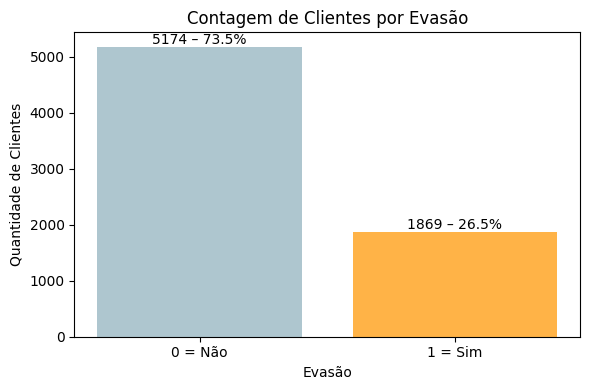

In [149]:
# Contagem e propor√ß√£o dos valores de evas√£o
contagem = df_normalizado['Evasao'].value_counts().sort_index()
proporcao = df_normalizado['Evasao'].value_counts(normalize=True).sort_index() * 100

# R√≥tulos e cores
labels = ['0 = N√£o', '1 = Sim']
cores = ['#AEC6CF', '#FFB347']  # pastel azul e laranja

# Cria√ß√£o do gr√°fico
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, contagem.values, color=cores)

# T√≠tulo e eixos
plt.title('Contagem de Clientes por Evas√£o')
plt.xlabel('Evas√£o')
plt.ylabel('Quantidade de Clientes')

# Adiciona r√≥tulos com quantidade + percentual
for bar, qtd, perc in zip(bars, contagem.values, proporcao.values):
    altura = bar.get_height()
    texto = f'{qtd} ‚Äì {perc:.1f}%'
    plt.text(bar.get_x() + bar.get_width()/2, altura + max(contagem)*0.01, texto,
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [150]:
# An√°lise de perfil dos clientes
df_normalizado[['Cobranca_Mensal', 'Cobranca_Total', 'Meses_Contrato', 'Contas_Diarias']].agg(['mean', 'median', 'std'])

Cobranca_Mensal  Cobranca_Total  Meses_Contrato  Contas_Diarias
mean          64.761692     2279.734304       32.371149        2.158675
median        70.350000     1394.550000       29.000000        2.340000
std           30.090047     2266.794470       24.559481        1.003088

## An√°lise das vari√°veis categ√≥ricas

In [151]:
# Distribui√ß√£o por g√™nero
df_normalizado['Genero'].value_counts(normalize=True) * 100

Genero
Masculino    50.47565
Feminino     49.52435
Name: proportion, dtype: float64

In [152]:
# Forma de pagamento e churn
df_normalizado.groupby('Forma_Pagamento')['Evasao'].mean().sort_values(ascending=False) * 100

/tmp/ipython-input-266354361.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_normalizado.groupby('Forma_Pagamento')['Evasao'].mean().sort_values(ascending=False) * 100


Forma_Pagamento
D√©bito autom√°tico                      45.285412
Boleto por correio                     19.106700
Transfer√™ncia banc√°ria (autom√°tica)    16.709845
Cart√£o de cr√©dito (autom√°tico)         15.243101
Name: Evasao, dtype: float64

In [153]:
# Comparando valores m√©dios entre clientes com e sem evas√£o
df_normalizado.groupby('Evasao')[['Cobranca_Mensal', 'Cobranca_Total', 'Meses_Contrato']].mean().round(2)

Cobranca_Mensal  Cobranca_Total  Meses_Contrato
Evasao                                                 
0                 61.27         2549.91           37.57
1                 74.44         1531.80           17.98

## An√°lise Gr√°fica

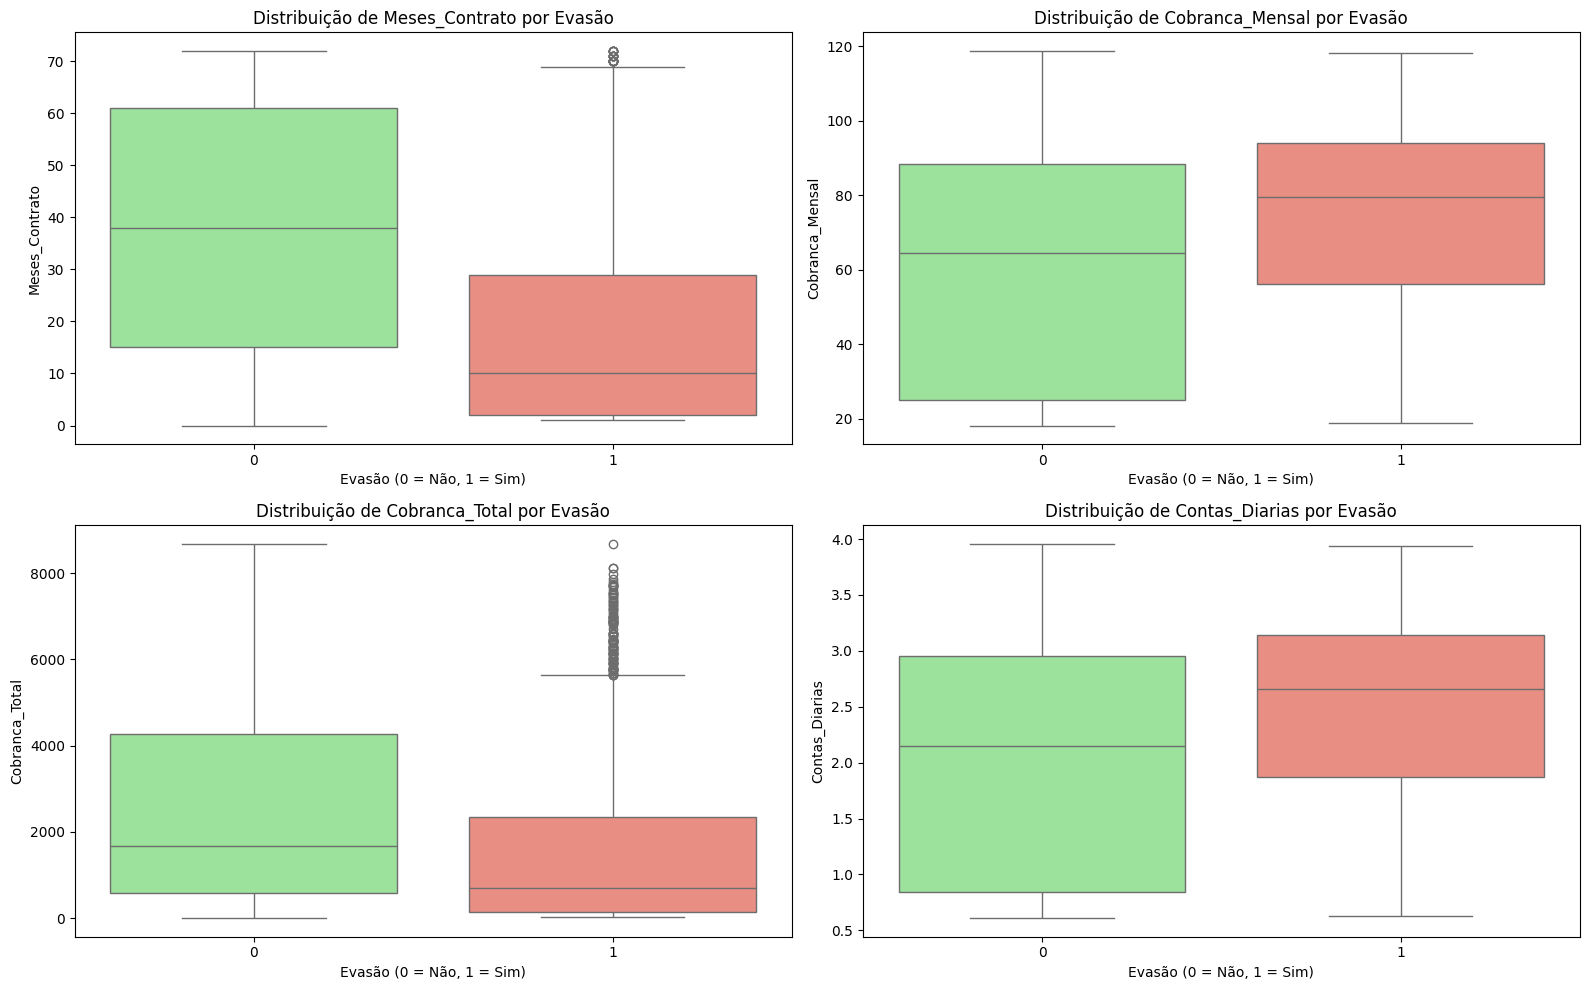

In [154]:
# Boxplot para comparar distribui√ß√£o entre clientes com churn e sem churn
plt.figure(figsize=(16, 10))

# Define the list of numerical columns to plot
numericas = ['Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total', 'Contas_Diarias']

for i, var in enumerate(numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_normalizado, x='Evasao', y=var, hue='Evasao', palette={0: 'lightgreen', 1: 'salmon'}, dodge=False)
    plt.title(f'Distribui√ß√£o de {var} por Evas√£o')
    plt.xlabel('Evas√£o (0 = N√£o, 1 = Sim)')
    plt.ylabel(var)
    plt.legend([], [], frameon=False)  # oculta legenda redundante

plt.tight_layout()
plt.savefig('box_plots.png', dpi=300, bbox_inches='tight')
plt.show()

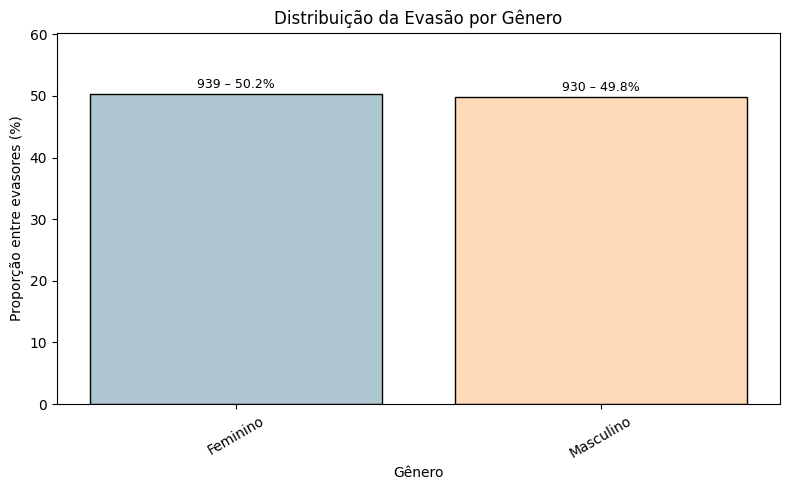

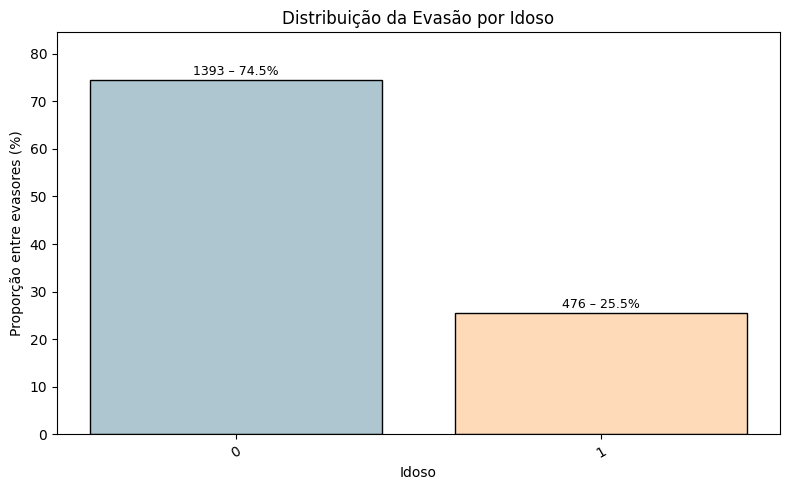

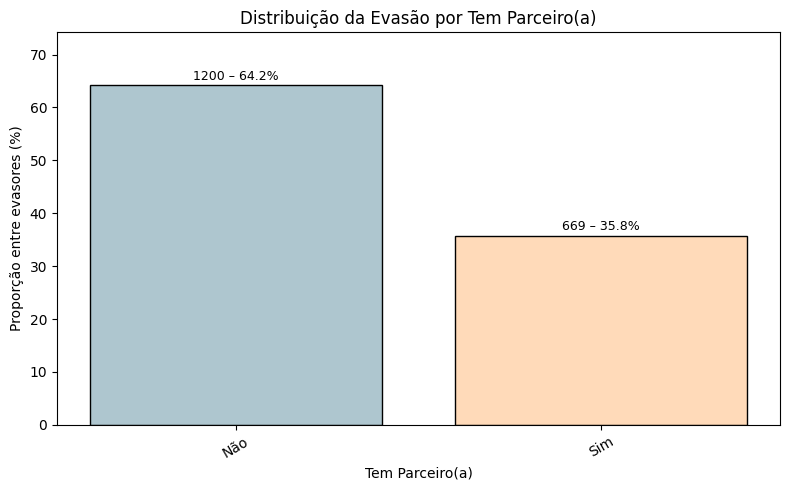

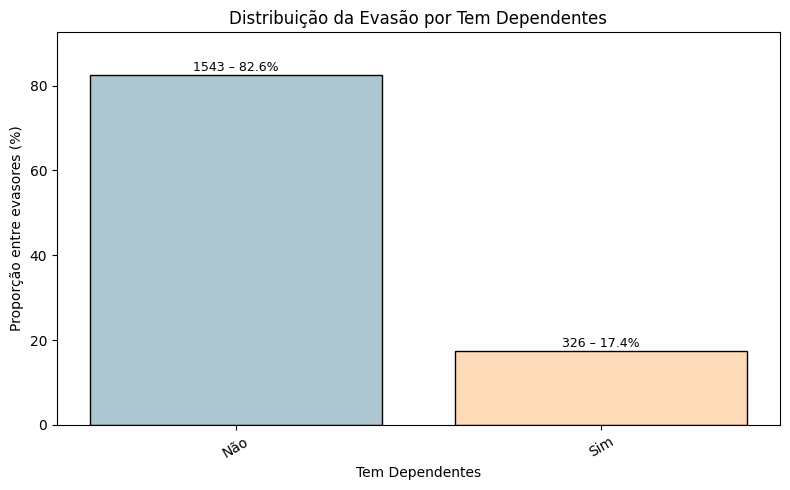

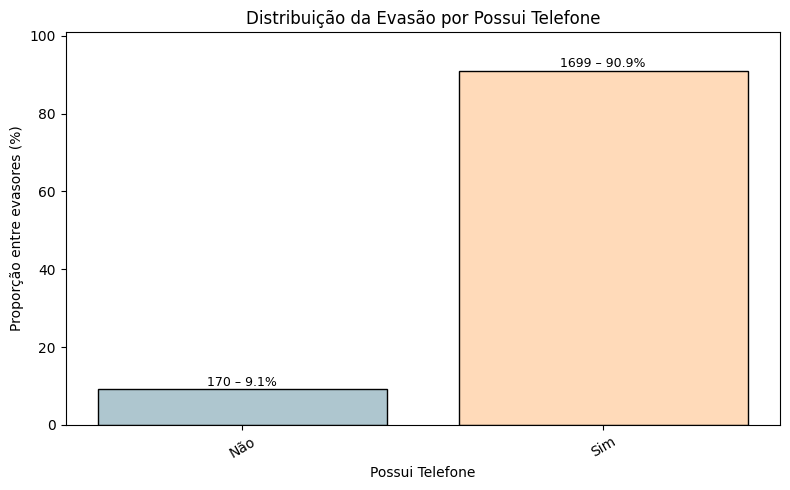

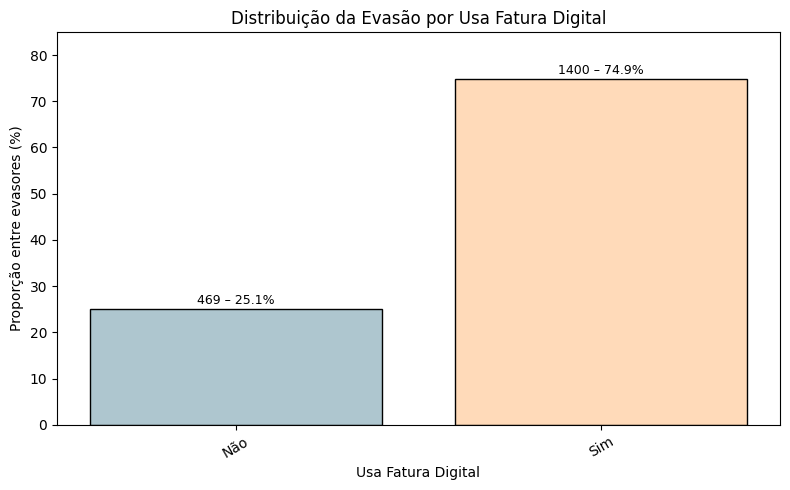

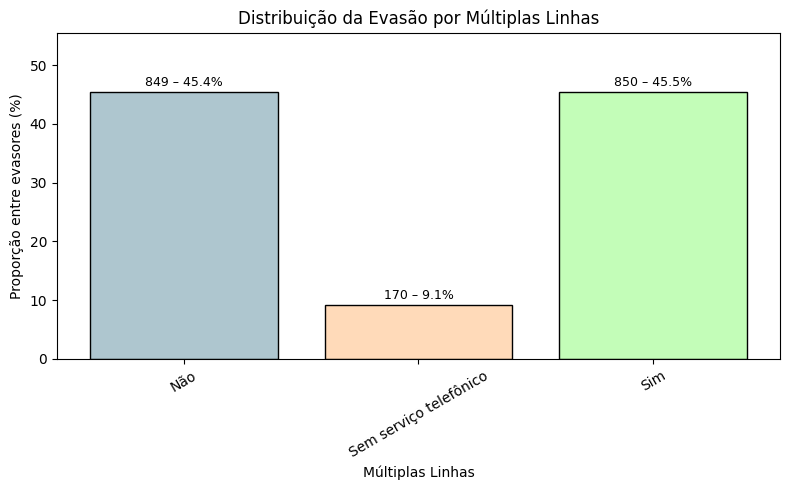

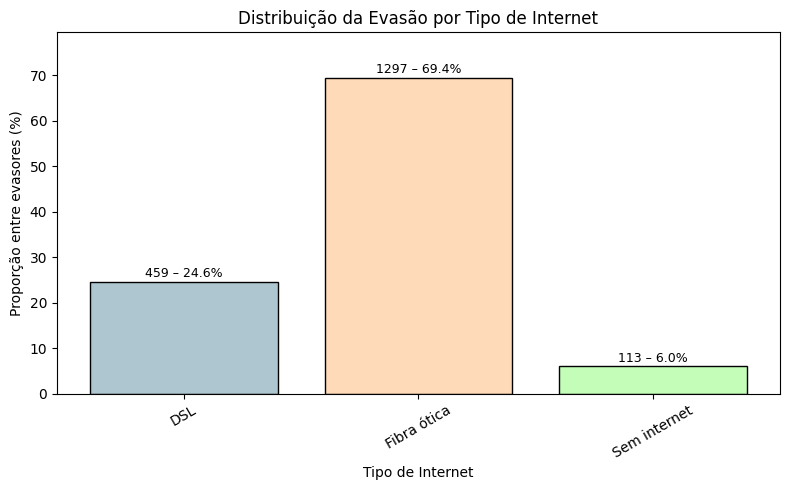

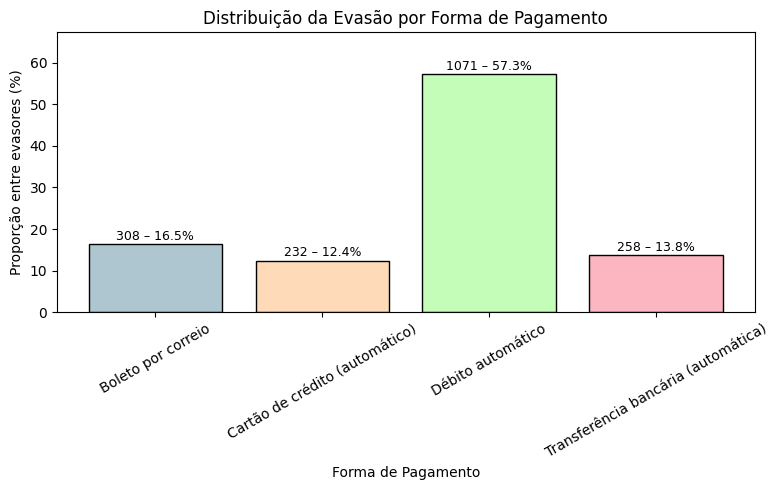

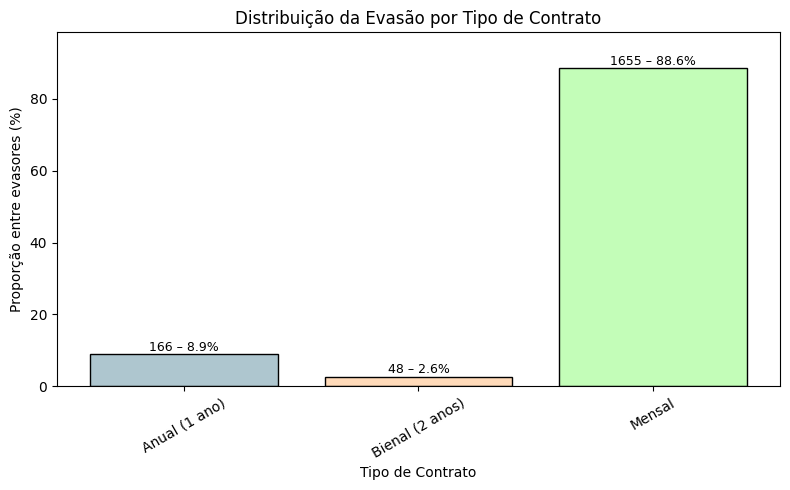

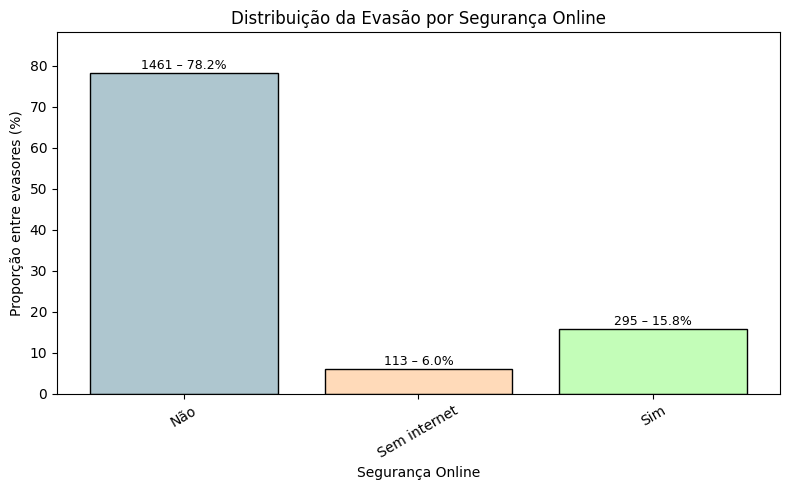

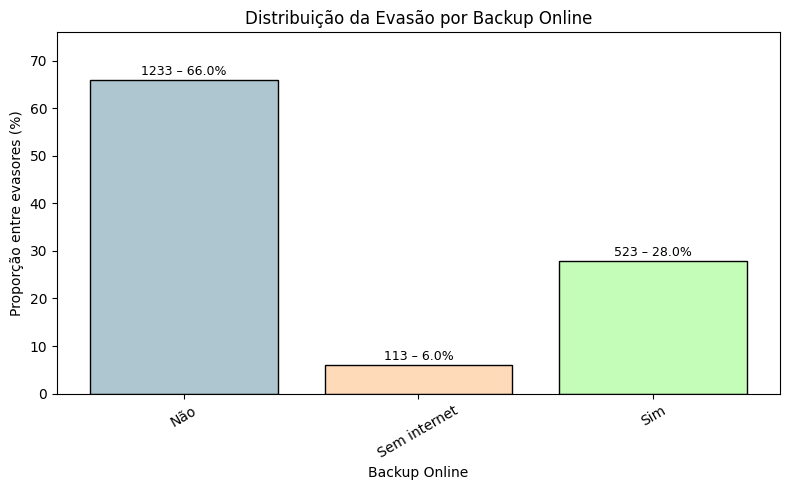

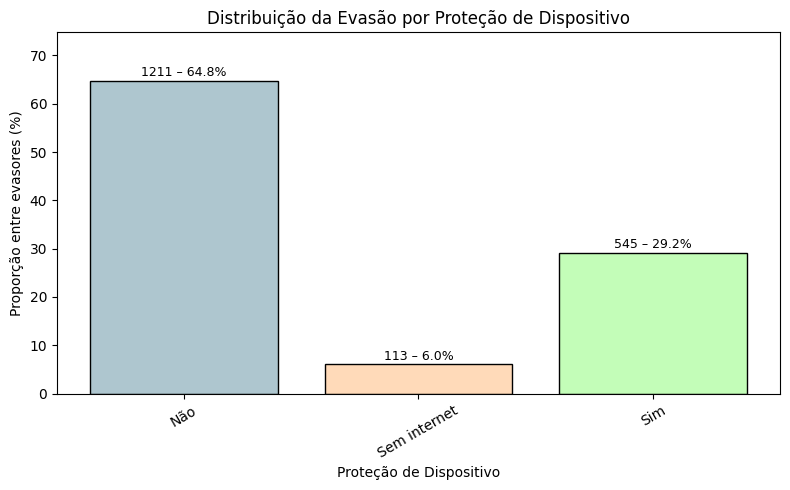

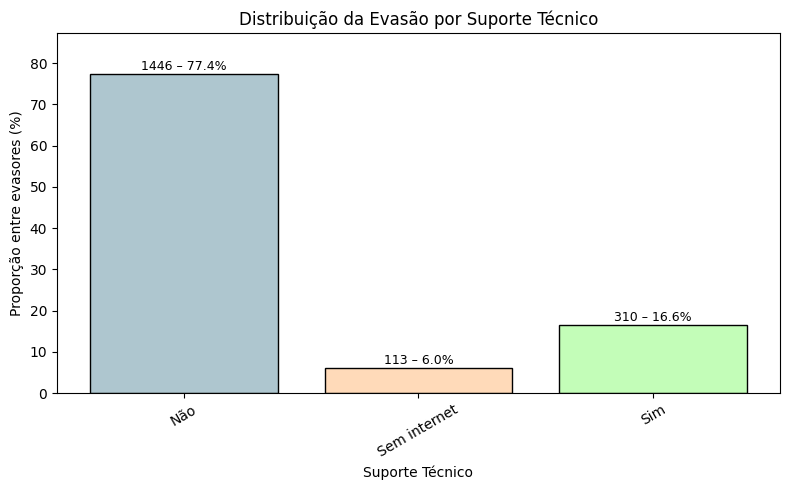

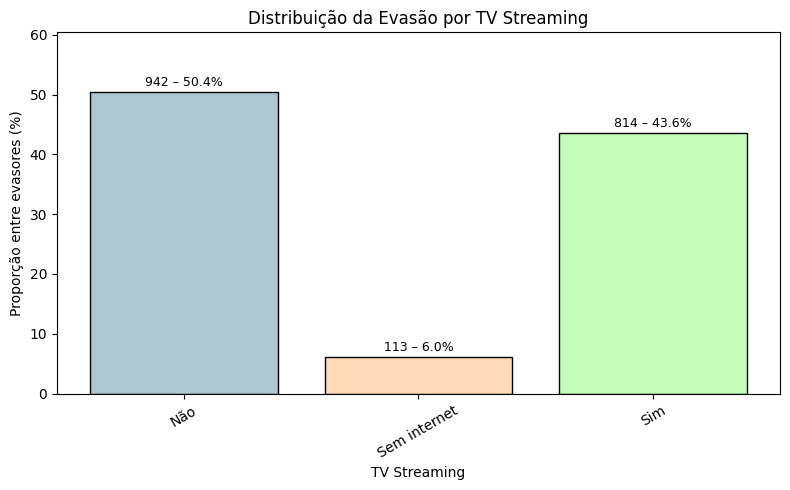

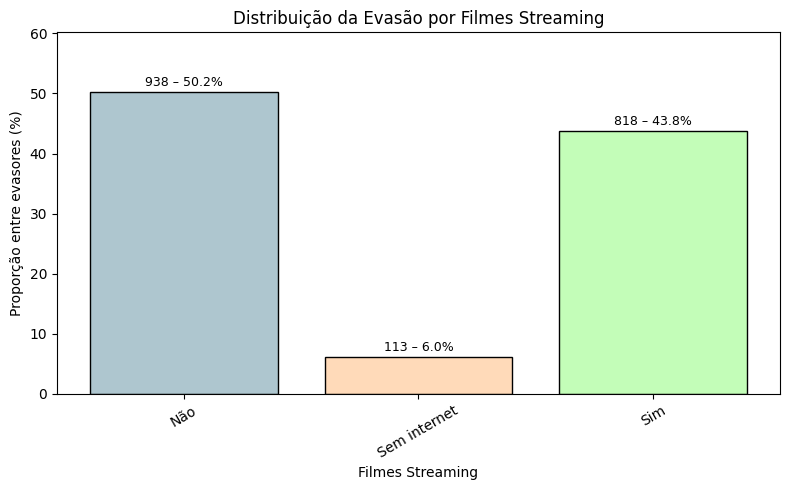

In [155]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtra os clientes que evadiram
evasao = df_normalizado[df_normalizado['Evasao'] == 1]

# Dicion√°rio com vari√°veis categ√≥ricas e t√≠tulos leg√≠veis
variaveis = {
    'Genero': 'G√™nero',
    'Idoso': 'Idoso',
    'Tem_Parceiro': 'Tem Parceiro(a)',
    'Tem_Dependentes': 'Tem Dependentes',
    'Telefone': 'Possui Telefone',
    'Fatura_Digital': 'Usa Fatura Digital',
    'Multiplas_Linhas': 'M√∫ltiplas Linhas',
    'Tipo_Internet': 'Tipo de Internet',
    'Forma_Pagamento': 'Forma de Pagamento',
    'Tipo_Contrato': 'Tipo de Contrato',
    'Seguranca_Online': 'Seguran√ßa Online',
    'Backup_Online': 'Backup Online',
    'Protecao_Dispositivo': 'Prote√ß√£o de Dispositivo',
    'Suporte_Tecnico': 'Suporte T√©cnico',
    'TV_Streaming': 'TV Streaming',
    'Filmes_Streaming': 'Filmes Streaming'
}

# Loop por vari√°vel
for col, titulo in variaveis.items():
    contagem = evasao[col].value_counts()
    proporcao = evasao[col].value_counts(normalize=True) * 100

    df_plot = pd.DataFrame({
        'Categoria': contagem.index,
        'Quantidade': contagem.values,
        'Percentual': proporcao.values
    })

    # Ordena pelas categorias
    df_plot = df_plot.sort_values(by='Categoria')

    categorias = df_plot['Categoria'].astype(str)
    quantidades = df_plot['Quantidade']
    percentuais = df_plot['Percentual']

    x = range(len(categorias))
    cores = ['#AEC6CF', '#FFDAB9', '#C3FDB8', '#FBB6C2', '#D6A4A4', '#B0E0E6']  # pode ajustar

    plt.figure(figsize=(8, 5))
    bars = plt.bar(x, percentuais, color=cores[:len(categorias)], edgecolor='black')

    # R√≥tulos "quantidade ‚Äì percentual%" em cada barra
    for i, bar in enumerate(bars):
        altura = bar.get_height()
        label = f"{quantidades.iloc[i]} ‚Äì {percentuais.iloc[i]:.1f}%"
        plt.text(bar.get_x() + bar.get_width() / 2, altura + 1, label, ha='center', fontsize=9)

    plt.xticks(x, categorias, rotation=30)
    plt.ylim(0, percentuais.max() + 10)
    plt.title(f'Distribui√ß√£o da Evas√£o por {titulo}')
    plt.xlabel(titulo)
    plt.ylabel('Propor√ß√£o entre evasores (%)')
    plt.tight_layout()
    plt.show()


#Relat√≥rio Final

# üìä Relat√≥rio Final ‚Äì An√°lise de Evas√£o de Clientes (Churn)

## üß≠ Introdu√ß√£o

A evas√£o de clientes (churn) √© um dos principais desafios enfrentados por empresas que atuam com servi√ßos por assinatura. A reten√ß√£o de clientes √© mais econ√¥mica do que a aquisi√ß√£o de novos, tornando essencial a identifica√ß√£o dos fatores que contribuem para o cancelamento do servi√ßo.

Neste projeto, realizamos uma an√°lise detalhada de um conjunto de dados fict√≠cio de uma empresa de telecomunica√ß√µes, com o objetivo de identificar padr√µes de comportamento entre os clientes que cancelaram e os que permaneceram. A an√°lise visa fornecer **insights que possam embasar a√ß√µes estrat√©gicas para reduzir o churn**.

---

## üßπ Limpeza e Tratamento de Dados

As principais etapas de prepara√ß√£o dos dados inclu√≠ram:

- **Importa√ß√£o do dataset** contendo informa√ß√µes de mais de 7.000 clientes.
- **Convers√£o da vari√°vel `Evasao`** (Churn) de valores booleanos para 0 (n√£o evadiu) e 1 (evadiu), facilitando a an√°lise visual.
- **An√°lise e tratamento de valores ausentes**, que foram inexistentes no conjunto de dados.
- **Convers√£o de colunas categ√≥ricas para o tipo `category`**, otimizando o desempenho da an√°lise.
- **Cria√ß√£o de novas vari√°veis**, como `Contas_Diarias` (Cobranca_Total dividida pelos Meses_Contrato), para medir a m√©dia di√°ria de cobran√ßa.

---

## üìä An√°lise Explorat√≥ria de Dados (EDA)

### üéØ Distribui√ß√£o da Evas√£o

Visualizamos a propor√ß√£o de clientes que evadiram em rela√ß√£o ao total:

üìå Resultado: Cerca de **27% dos clientes cancelaram o servi√ßo**, o que √© um √≠ndice relevante para aten√ß√£o.

### üìà Vari√°veis Num√©ricas x Evas√£o

Foi realizada uma an√°lise com **boxplots** para comparar vari√°veis como:

- `Meses_Contrato`
- `Cobranca_Mensal`
- `Cobranca_Total`
- `Contas_Diarias`

üìç **Principais padr√µes identificados:**

- **Clientes com menos meses de contrato tendem a evadir**, sugerindo churn precoce.
- **Cobrancas mensais mais altas** est√£o associadas √† evas√£o.
- Clientes que evadiram contribu√≠ram com **valores totais mais baixos**, indicando cancelamentos iniciais.
- **Cobran√ßas di√°rias elevadas** tamb√©m se associam a maior churn.

### üìä Vari√°veis Categ√≥ricas x Evas√£o

Foram utilizados gr√°ficos de barras para mostrar a distribui√ß√£o dos **clientes que evadiram** em rela√ß√£o a categorias como:

- G√™nero, Idade, Ter ou n√£o parceiro, Dependentes
- Tipo de Internet e Contrato
- Presen√ßa de servi√ßos adicionais (Streaming, Suporte, Seguran√ßa)
- Forma de pagamento

üìç **Padr√µes relevantes:**

- **Clientes com contrato mensal evadem mais** do que os com contratos anuais.
- **Pagamentos por d√©bito autom√°tico** est√° mais associado ao churn.
- **Clientes que n√£o utilizam servi√ßos adicionais**, como streaming ou suporte t√©cnico, aparecem mais entre os evasores.

---

## üîç Conclus√µes e Insights

A an√°lise revelou que:

- A evas√£o est√° fortemente ligada a **contratos curtos**, **cobranca elevada** e **pouco engajamento com os servi√ßos da empresa**.
- Clientes com **baixo tempo de contrato e alto valor de cobran√ßa mensal ou di√°ria** tendem a cancelar com maior frequ√™ncia.
- Fatores como **forma de pagamento** e **tipo de internet** tamb√©m influenciam o churn.

---

## üí° Recomenda√ß√µes Estrat√©gicas

Com base na an√°lise, sugerimos:

1. **Campanhas de reten√ß√£o nos primeiros meses de contrato**, especialmente com benef√≠cios ou descontos progressivos.
2. **Oferecer pacotes promocionais** para clientes com cobran√ßa mensal elevada.
3. **Estimular o uso de servi√ßos adicionais**, como streaming, backup e suporte, com testes gratuitos ou planos integrados.
4. **Incentivar formas de pagamento autom√°ticas ou com desconto**, reduzindo o churn associado a m√©todos manuais.
5. Criar **alertas preditivos internos com base nos padr√µes identificados**, para agir de forma preventiva com clientes em risco.

---

‚úÖ Com essa an√°lise, a empresa pode entender melhor **quem s√£o os clientes em risco de evas√£o** e **quais a√ß√µes podem ser adotadas para aumentar a reten√ß√£o**, impactando diretamente a receita e a fideliza√ß√£o de clientes.



#EXTRA: An√°lise de Correla√ß√£o entre Vari√°veis

In [156]:
# Calcula correla√ß√£o entre vari√°veis num√©ricas
correlacoes = df_normalizado.corr(numeric_only=True)

# Exibe correla√ß√£o da vari√°vel 'Evasao' com as outras
correlacoes['Evasao'].sort_values(ascending=False)


Evasao             1.000000
Contas_Diarias     0.193412
Cobranca_Mensal    0.193356
Idoso              0.150889
Cobranca_Total    -0.198324
Meses_Contrato    -0.352229
Name: Evasao, dtype: float64

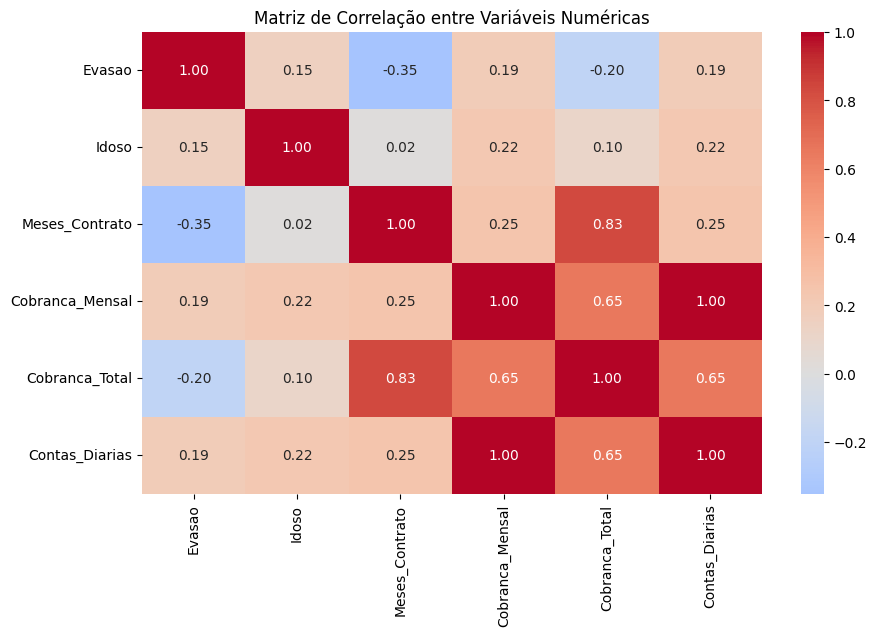

In [157]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas')
plt.savefig('matriz_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-2689915283.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Contas_Diarias', data=df_normalizado, palette='pastel')


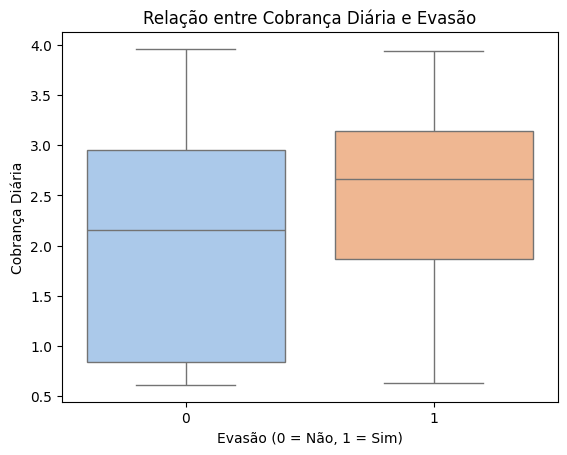

In [158]:
sns.boxplot(x='Evasao', y='Contas_Diarias', data=df_normalizado, palette='pastel')
plt.title('Rela√ß√£o entre Cobran√ßa Di√°ria e Evas√£o')
plt.xlabel('Evas√£o (0 = N√£o, 1 = Sim)')
plt.ylabel('Cobran√ßa Di√°ria')
plt.show()


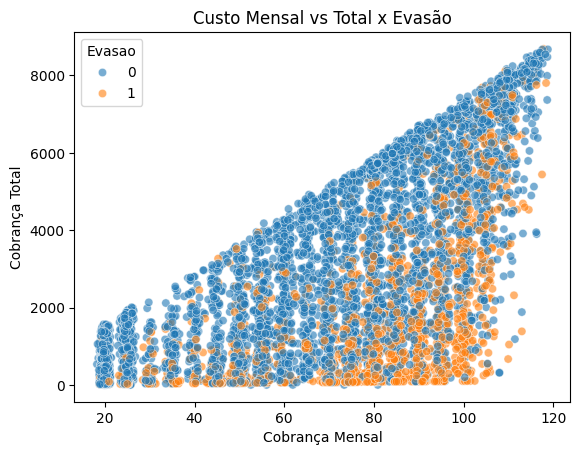

In [159]:
sns.scatterplot(x='Cobranca_Mensal', y='Cobranca_Total', hue='Evasao', data=df_normalizado, alpha=0.6)
plt.title('Custo Mensal vs Total x Evas√£o')
plt.xlabel('Cobran√ßa Mensal')
plt.ylabel('Cobran√ßa Total')
plt.show()


# Parte 2 - Projeto Telecom X

## Remo√ß√£o de Colunas Irrelevantes

In [160]:
# Criar uma an√°lise de relev√¢ncia inicial das colunas
colunas = df_normalizado.columns.tolist()

# Descri√ß√£o manual de cada coluna
analise_colunas = [
    ("ID_Cliente", "Identificador √∫nico, n√£o possui valor preditivo para churn. Deve ser removida."),
    ("Evasao", "Vari√°vel-alvo (0 = n√£o evadiu, 1 = evadiu). Essencial para treinamento do modelo."),
    ("Genero", "Pode ter alguma correla√ß√£o cultural/comportamental, mas n√£o √© determinante. Pode ser mantida para avalia√ß√£o."),
    ("Idoso", "Indica se √© cliente idoso. Pode influenciar padr√µes de consumo e evas√£o."),
    ("Tem_Parceiro", "Pode indicar perfil de consumo familiar ou individual. Poss√≠vel relev√¢ncia para churn."),
    ("Tem_Dependentes", "Relacionada a gastos e perman√™ncia do cliente. Pode ser relevante."),
    ("Meses_Contrato", "Tempo de contrato √© fortemente correlacionado com a probabilidade de evas√£o."),
    ("Telefone", "Ter ou n√£o servi√ßo de telefonia pode influenciar fidelidade."),
    ("Multiplas_Linhas", "Relacionado ao pacote contratado. Pode afetar a evas√£o."),
    ("Tipo_Internet", "DSL, Fibra √≥tica ou nenhum. Forte impacto na satisfa√ß√£o e churn."),
    ("Seguranca_Online", "Servi√ßo adicional. Pode aumentar v√≠nculo do cliente."),
    ("Backup_Online", "Outro servi√ßo adicional. Pode influenciar reten√ß√£o."),
    ("Protecao_Dispositivo", "Servi√ßo adicional. Pode aumentar valor percebido."),
    ("Suporte_Tecnico", "Acesso a suporte pode reduzir evas√£o."),
    ("TV_Streaming", "Servi√ßo adicional que pode aumentar engajamento."),
    ("Filmes_Streaming", "Outro servi√ßo adicional que pode aumentar engajamento."),
    ("Tipo_Contrato", "Mensal, Anual, Bianual. Afeta diretamente a probabilidade de churn."),
    ("Fatura_Digital", "Pode refletir perfil tecnol√≥gico do cliente."),
    ("Forma_Pagamento", "Pode influenciar conveni√™ncia e reten√ß√£o."),
    ("Cobranca_Mensal", "Valor pago mensalmente. Pode ter rela√ß√£o com evas√£o."),
    ("Cobranca_Total", "Valor total gasto at√© agora. Altamente correlacionado com tempo de contrato."),
    ("Contas_Diarias", "M√©trica derivada (possivelmente calculada). Pode trazer informa√ß√£o adicional, mas deve ser avaliada contra multicolinearidade.")
]

# Criar dataframe para exibi√ß√£o
df_analise = pd.DataFrame(analise_colunas, columns=["Coluna", "Relev√¢ncia / Observa√ß√£o"])

In [161]:
df_analise

Coluna                            Relev√¢ncia / Observa√ß√£o
0             ID_Cliente  Identificador √∫nico, n√£o possui valor preditiv...
1                 Evasao  Vari√°vel-alvo (0 = n√£o evadiu, 1 = evadiu). Es...
2                 Genero  Pode ter alguma correla√ß√£o cultural/comportame...
3                  Idoso  Indica se √© cliente idoso. Pode influenciar pa...
4           Tem_Parceiro  Pode indicar perfil de consumo familiar ou ind...
5        Tem_Dependentes  Relacionada a gastos e perman√™ncia do cliente....
6         Meses_Contrato  Tempo de contrato √© fortemente correlacionado ...
7               Telefone  Ter ou n√£o servi√ßo de telefonia pode influenci...
8       Multiplas_Linhas  Relacionado ao pacote contratado. Pode afetar ...
9          Tipo_Internet  DSL, Fibra √≥tica ou nenhum. Forte impacto na s...
10      Seguranca_Online  Servi√ßo adicional. Pode aumentar v√≠nculo do cl...
11         Backup_Online  Outro servi√ßo adicional. Pode influenciar rete...
12  Protecao_Dispositivo  Servi√ßo adicional. Pode aumentar valor percebido.
13       Suporte_Tecnico              Acesso a suporte pode reduzir evas√£o.
14          TV_Streaming   Servi√ßo adicional que pode aumentar engajamento.
15      Filmes_Streaming  Outro servi√ßo adicional que pode aumentar enga...
16         Tipo_Contrato  Mensal, Anual, Bianual. Afeta diretamente a pr...
17        Fatura_Digital       Pode refletir perfil tecnol√≥gico do cliente.
18       Forma_Pagamento          Pode influenciar conveni√™ncia e reten√ß√£o.
19       Cobranca_Mensal  Valor pago mensalmente. Pode ter rela√ß√£o com e...
20        Cobranca_Total  Valor total gasto at√© agora. Altamente correla...
21        Contas_Diarias  M√©trica derivada (possivelmente calculada). Po...

In [162]:
# Remover a coluna 'ID_Cliente'
df_normalizado = df_normalizado.drop('ID_Cliente', axis=1)

# Verificar se a coluna foi removida
print(df_normalizado.columns)

Index(['Evasao', 'Genero', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes',
       'Meses_Contrato', 'Telefone', 'Multiplas_Linhas', 'Tipo_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
       'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato',
       'Fatura_Digital', 'Forma_Pagamento', 'Cobranca_Mensal',
       'Cobranca_Total', 'Contas_Diarias'],
      dtype='object')


# Separando a vari√°vel alvo e as vari√°veis explicativas

In [163]:
x = df_normalizado.drop('Evasao', axis = 1)
y = df_normalizado['Evasao']

In [164]:
x

Genero  Idoso Tem_Parceiro Tem_Dependentes  Meses_Contrato Telefone  \
0      Feminino      0          Sim             Sim               9      Sim   
1     Masculino      0          N√£o             N√£o               9      Sim   
2     Masculino      0          N√£o             N√£o               4      Sim   
3     Masculino      1          Sim             N√£o              13      Sim   
4      Feminino      1          Sim             N√£o               3      Sim   
...         ...    ...          ...             ...             ...      ...   
7262   Feminino      0          N√£o             N√£o              13      Sim   
7263  Masculino      0          Sim             N√£o              22      Sim   
7264  Masculino      0          N√£o             N√£o               2      Sim   
7265  Masculino      0          Sim             Sim              67      Sim   
7266  Masculino      0          Sim             Sim              63      N√£o   

            Multiplas_Linhas Tipo_Internet Seguranca_Online Backup_Online  \
0                        N√£o           DSL              N√£o           Sim   
1                        Sim           DSL              N√£o           N√£o   
2                        N√£o   Fibra √≥tica              N√£o           N√£o   
3                        N√£o   Fibra √≥tica              N√£o           Sim   
4                        N√£o   Fibra √≥tica              N√£o           N√£o   
...                      ...           ...              ...           ...   
7262                     N√£o           DSL              Sim           N√£o   
7263                     Sim   Fibra √≥tica              N√£o           N√£o   
7264                     N√£o           DSL              N√£o           Sim   
7265                     N√£o           DSL              Sim           N√£o   
7266  Sem servi√ßo telef√¥nico           DSL              Sim           Sim   

     Protecao_Dispositivo Suporte_Tecnico TV_Streaming Filmes_Streaming  \
0                     N√£o             Sim          Sim              N√£o   
1                     N√£o             N√£o          N√£o              Sim   
2                     Sim             N√£o          N√£o              N√£o   
3                     Sim             N√£o          Sim              Sim   
4                     N√£o             Sim          Sim              N√£o   
...                   ...             ...          ...              ...   
7262                  N√£o             Sim          N√£o              N√£o   
7263                  N√£o             N√£o          N√£o              Sim   
7264                  N√£o             N√£o          N√£o              N√£o   
7265                  Sim             Sim          N√£o              Sim   
7266                  Sim             N√£o          Sim              Sim   

        Tipo_Contrato Fatura_Digital     Forma_Pagamento  Cobranca_Mensal  \
0       Anual (1 ano)            Sim  Boleto por correio            65.60   
1              Mensal            N√£o  Boleto por correio            59.90   
2              Mensal            Sim   D√©bito autom√°tico            73.90   
3              Mensal            Sim   D√©bito autom√°tico            98.00   
4              Mensal            Sim  Boleto por correio            83.90   
...               ...            ...                 ...              ...   
7262    Anual (1 ano)            N√£o  Boleto por correio            55.15   
7263           Mensal            Sim   D√©bito autom√°tico            85.10   
7264           Mensal            Sim  Boleto por correio            50.30   
7265  Bienal (2 anos)            N√£o  Boleto por correio            67.85   
7266  Bienal (2 anos)            N√£o   D√©bito autom√°tico            59.00   

      Cobranca_Total  Contas_Diarias  
0             593.30            2.19  
1             542.40            2.00  
2             280.85            2.46  
3            1237.85            3.27  
4             267.40         

In [165]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7262    0
7263    1
7264    0
7265    0
7266    0
Name: Evasao, Length: 7043, dtype: int64

# Transformando vari√°veis explicativas

In [166]:
df_normalizado.head()

Evasao     Genero  Idoso Tem_Parceiro Tem_Dependentes  Meses_Contrato  \
0       0   Feminino      0          Sim             Sim               9   
1       0  Masculino      0          N√£o             N√£o               9   
2       1  Masculino      0          N√£o             N√£o               4   
3       1  Masculino      1          Sim             N√£o              13   
4       1   Feminino      1          Sim             N√£o               3   

  Telefone Multiplas_Linhas Tipo_Internet Seguranca_Online  ...  \
0      Sim              N√£o           DSL              N√£o  ...   
1      Sim              Sim           DSL              N√£o  ...   
2      Sim              N√£o   Fibra √≥tica              N√£o  ...   
3      Sim              N√£o   Fibra √≥tica              N√£o  ...   
4      Sim              N√£o   Fibra √≥tica              N√£o  ...   

  Protecao_Dispositivo Suporte_Tecnico TV_Streaming Filmes_Streaming  \
0                  N√£o             Sim          Sim              N√£o   
1                  N√£o             N√£o          N√£o              Sim   
2                  Sim             N√£o          N√£o              N√£o   
3                  Sim             N√£o          Sim              Sim   
4                  N√£o             Sim          Sim              N√£o   

   Tipo_Contrato Fatura_Digital     Forma_Pagamento Cobranca_Mensal  \
0  Anual (1 ano)            Sim  Boleto por correio            65.6   
1         Mensal            N√£o  Boleto por correio            59.9   
2         Mensal            Sim   D√©bito autom√°tico            73.9   
3         Mensal            Sim   D√©bito autom√°tico            98.0   
4         Mensal            Sim  Boleto por correio            83.9   

   Cobranca_Total  Contas_Diarias  
0          593.30            2.19  
1          542.40            2.00  
2          280.85            2.46  
3         1237.85            3.27  
4          267.40            2.80  

[5 rows x 21 columns]

In [167]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [168]:
# Armazenando o nome das colunas antes da aplica√ß√£o do One Hot Encoder
colunas = x.columns
colunas

Index(['Genero', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes', 'Meses_Contrato',
       'Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato', 'Fatura_Digital',
       'Forma_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total',
       'Contas_Diarias'],
      dtype='object')

In [169]:
# Verifica e imprime os dados existentes nas colunas categ√≥ricas
for col in ['Evasao','Genero', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes',
       'Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato', 'Fatura_Digital',
       'Forma_Pagamento']:
    print(f"{col}: {df_normalizado[col].unique()}")

Evasao: [0 1]
Genero: ['Feminino', 'Masculino']
Categories (2, object): ['Feminino', 'Masculino']
Idoso: [0 1]
Tem_Parceiro: ['Sim', 'N√£o']
Categories (2, object): ['N√£o', 'Sim']
Tem_Dependentes: ['Sim', 'N√£o']
Categories (2, object): ['N√£o', 'Sim']
Telefone: ['Sim', 'N√£o']
Categories (2, object): ['N√£o', 'Sim']
Multiplas_Linhas: ['N√£o', 'Sim', 'Sem servi√ßo telef√¥nico']
Categories (3, object): ['N√£o', 'Sem servi√ßo telef√¥nico', 'Sim']
Tipo_Internet: ['DSL', 'Fibra √≥tica', 'Sem internet']
Categories (3, object): ['DSL', 'Fibra √≥tica', 'Sem internet']
Seguranca_Online: ['N√£o', 'Sim', 'Sem internet']
Categories (3, object): ['N√£o', 'Sem internet', 'Sim']
Backup_Online: ['Sim', 'N√£o', 'Sem internet']
Categories (3, object): ['N√£o', 'Sem internet', 'Sim']
Protecao_Dispositivo: ['N√£o', 'Sim', 'Sem internet']
Categories (3, object): ['N√£o', 'Sem internet', 'Sim']
Suporte_Tecnico: ['Sim', 'N√£o', 'Sem internet']
Categories (3, object): ['N√£o', 'Sem internet', 'Sim']
TV_Stre

In [170]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['Genero', 'Tem_Parceiro', 'Tem_Dependentes', 'Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato', 'Fatura_Digital',
       'Forma_Pagamento']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [171]:
x = one_hot.fit_transform(x)

In [172]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Genero_Masculino',
       'onehotencoder__Tem_Parceiro_Sim',
       'onehotencoder__Tem_Dependentes_Sim',
       'onehotencoder__Telefone_Sim',
       'onehotencoder__Multiplas_Linhas_N√£o',
       'onehotencoder__Multiplas_Linhas_Sem servi√ßo telef√¥nico',
       'onehotencoder__Multiplas_Linhas_Sim',
       'onehotencoder__Tipo_Internet_DSL',
       'onehotencoder__Tipo_Internet_Fibra √≥tica',
       'onehotencoder__Tipo_Internet_Sem internet',
       'onehotencoder__Seguranca_Online_N√£o',
       'onehotencoder__Seguranca_Online_Sem internet',
       'onehotencoder__Seguranca_Online_Sim',
       'onehotencoder__Backup_Online_N√£o',
       'onehotencoder__Backup_Online_Sem internet',
       'onehotencoder__Backup_Online_Sim',
       'onehotencoder__Protecao_Dispositivo_N√£o',
       'onehotencoder__Protecao_Dispositivo_Sem internet',
       'onehotencoder__Protecao_Dispositivo_Sim',
       'onehotencoder__Suporte_Tecnico_N√£o',
       'onehotencoder__Suporte_Te

In [173]:
df_normalizado_encoding = pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))
df_normalizado_encoding

onehotencoder__Genero_Masculino  onehotencoder__Tem_Parceiro_Sim  \
0                                 0.0                              1.0   
1                                 1.0                              0.0   
2                                 1.0                              0.0   
3                                 1.0                              1.0   
4                                 0.0                              1.0   
...                               ...                              ...   
7038                              0.0                              0.0   
7039                              1.0                              1.0   
7040                              1.0                              0.0   
7041                              1.0                              1.0   
7042                              1.0                              1.0   

      onehotencoder__Tem_Dependentes_Sim  onehotencoder__Telefone_Sim  \
0                                    1.0                          1.0   
1                                    0.0                          1.0   
2                                    0.0                          1.0   
3                                    0.0                          1.0   
4                                    0.0                          1.0   
...                                  ...                          ...   
7038                                 0.0                          1.0   
7039                                 0.0                          1.0   
7040                                 0.0                          1.0   
7041                                 1.0                          1.0   
7042                                 1.0                          0.0   

      onehotencoder__Multiplas_Linhas_N√£o  \
0                                     1.0   
1                                     0.0   
2                                     1.0   
3                                     1.0   
4                                     1.0   
...                                   ...   
7038                                  1.0   
7039                                  0.0   
7040                                  1.0   
7041                                  1.0   
7042                                  0.0   

      onehotencoder__Multiplas_Linhas_Sem servi√ßo telef√¥nico  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
7038                                                0.0        
7039                                                0.0        
7040                                                0.0        
7041                                                0.0        
7042                                                1.0        

      onehotencoder__Multiplas_Linhas_Sim  onehotencoder__Tipo_Internet_DSL  \
0                                     0.0                               1.0   
1                                     1.0                               1.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   
...                                   ...                               ...   
7038                                  0.0                               1.0   
7039                                  1.0                               0.0   
7040                                  0.0                               1.0   
7041                                  0.0                               1.0   
7042                                  0.0                 

# Verifica√ß√£o da Propor√ß√£o de Evas√£o

In [174]:
# Distribui√ß√£o de Evas√£o (Churn)
y.value_counts(normalize=True) * 100

Evasao
0    73.463013
1    26.536987
Name: proportion, dtype: float64

De acordo com a avalia√ß√£o da propor√ß√£o de evas√£o, h√° desequil√≠brio entre as classes.

# Balanceamento de Classes

In [175]:
from imblearn.over_sampling import SMOTE

In [176]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [177]:
y_balanceado.value_counts(normalize = True)

Evasao
0    0.5
1    0.5
Name: proportion, dtype: float64

# An√°lise de Correla√ß√£o

In [178]:
df_normalizado_encoding.corr().round(4)

onehotencoder__Genero_Masculino  \
onehotencoder__Genero_Masculino                                              1.0000   
onehotencoder__Tem_Parceiro_Sim                                             -0.0018   
onehotencoder__Tem_Dependentes_Sim                                           0.0105   
onehotencoder__Telefone_Sim                                                 -0.0065   
onehotencoder__Multiplas_Linhas_N√£o                                          0.0045   
onehotencoder__Multiplas_Linhas_Sem servi√ßo tel...                           0.0065   
onehotencoder__Multiplas_Linhas_Sim                                         -0.0084   
onehotencoder__Tipo_Internet_DSL                                             0.0066   
onehotencoder__Tipo_Internet_Fibra √≥tica                                    -0.0113   
onehotencoder__Tipo_Internet_Sem internet                                    0.0060   
onehotencoder__Seguranca_Online_N√£o                                          0.0104   
onehotencoder__Seguranca_Online_Sem internet                                 0.0060   
onehotencoder__Seguranca_Online_Sim                                         -0.0170   
onehotencoder__Backup_Online_N√£o                                             0.0082   
onehotencoder__Backup_Online_Sem internet                                    0.0060   
onehotencoder__Backup_Online_Sim                                            -0.0138   
onehotencoder__Protecao_Dispositivo_N√£o                                     -0.0030   
onehotencoder__Protecao_Dispositivo_Sem internet                             0.0060   
onehotencoder__Protecao_Dispositivo_Sim                                     -0.0021   
onehotencoder__Suporte_Tecnico_N√£o                                           0.0034   
onehotencoder__Suporte_Tecnico_Sem internet                                  0.0060   
onehotencoder__Suporte_Tecnico_Sim                                          -0.0092   
onehotencoder__TV_Streaming_N√£o                                              0.0033   
onehotencoder__TV_Streaming_Sem internet                                     0.0060   
onehotencoder__TV_Streaming_Sim                                             -0.0084   
onehotencoder__Filmes_Streaming_N√£o                                          0.0054   
onehotencoder__Filmes_Streaming_Sem internet                                 0.0060   
onehotencoder__Filmes_Streaming_Sim                                         -0.0105   
onehotencoder__Tipo_Contrato_Anual (1 ano)                                   0.0080   
onehotencoder__Tipo_Contrato_Bienal (2 anos)                                -0.0037   
onehotencoder__Tipo_Contrato_Mensal                                         -0.0034   
onehotencoder__Fatura_Digital_Sim                                           -0.0118   
onehotencoder__Forma_Pagamento_Boleto por correio                            0.0137   
onehotencoder__Forma_Pagamento_Cart√£o de cr√©dit...                           0.0012   
onehotencoder__Forma_Pagamento_D√©bito autom√°tico                             0.0008   
onehotencoder__Forma_Pagamento_Transfer√™ncia ba...                          -0.0160   
remainder__Idoso                                                            -0.0019   
remainder__Meses_Contrato                                                    0.0051   
remainder__Cobranca_Mensal                                                  -0.0146   
remainder__Cobranca_Total                                                   -0.0001   
remainder__Contas_Diarias                                                   -0.0146   

                                                    onehotencoder__Tem_Parceiro_Sim  \
onehotencoder__Genero_Masculino                                             -0.0018   
onehotencoder__Tem_Parceiro_Sim                                              1.0000   
onehotencoder__Tem_Dependentes_Sim                                           0.4527   
onehotencoder__Telefone_Sim        

In [179]:
df_normalizado_encoding['Evasao'] = y

In [180]:
# Calcula correla√ß√£o entre vari√°veis
correlacoes = df_normalizado_encoding.corr(numeric_only=True)

# Exibe correla√ß√£o da vari√°vel 'Evasao' com as outras
correlacoes['Evasao'].sort_values(ascending=False)

Evasao                                                                1.000000
onehotencoder__Forma_Pagamento_Boleto por correio                     0.022860
onehotencoder__Tipo_Contrato_Mensal                                   0.020573
onehotencoder__TV_Streaming_Sim                                       0.016689
onehotencoder__Seguranca_Online_Sem internet                          0.013771
onehotencoder__Suporte_Tecnico_Sem internet                           0.013771
onehotencoder__Backup_Online_Sem internet                             0.013771
onehotencoder__Protecao_Dispositivo_Sem internet                      0.013771
onehotencoder__Tipo_Internet_Sem internet                             0.013771
onehotencoder__Filmes_Streaming_Sem internet                          0.013771
onehotencoder__TV_Streaming_Sem internet                              0.013771
onehotencoder__Telefone_Sim                                           0.011916
onehotencoder__Tipo_Internet_Fibra √≥tica                              0.009835
onehotencoder__Suporte_Tecnico_N√£o                                    0.008454
onehotencoder__Tem_Dependentes_Sim                                    0.007098
onehotencoder__Multiplas_Linhas_Sim                                   0.006887
onehotencoder__Backup_Online_N√£o                                      0.005126
onehotencoder__Protecao_Dispositivo_Sim                               0.002542
onehotencoder__Multiplas_Linhas_N√£o                                   0.000195
onehotencoder__Fatura_Digital_Sim                                    -0.000046
onehotencoder__Seguranca_Online_N√£o                                  -0.000111
onehotencoder__Tem_Parceiro_Sim                                      -0.000114
remainder__Contas_Diarias                                            -0.000219
remainder__Cobranca_Mensal                                           -0.000245
onehotencoder__Filmes_Streaming_N√£o                                  -0.002756
onehotencoder__Tipo_Contrato_Bienal (2 anos)                         -0.003032
onehotencoder__Forma_Pagamento_Cart√£o de cr√©dito (autom√°tico)        -0.003657
onehotencoder__Forma_Pagamento_D√©bito autom√°tico                     -0.008233
onehotencoder__Filmes_Streaming_Sim                                  -0.008880
remainder__Idoso                                                     -0.009778
onehotencoder__Forma_Pagamento_Transfer√™ncia banc√°ria (autom√°tica)   -0.010171
remainder__Cobranca_Total                                            -0.010640
onehotencoder__Multiplas_Linhas_Sem servi√ßo telef√¥nico               -0.011916
onehotencoder__Seguranca_Online_Sim                                  -0.012434
onehotencoder__Protecao_Dispositivo_N√£o                              -0.013870
onehotencoder__Genero_Masculino                                      -0.014149
remainder__Meses_Contrato                                            -0.015381
onehotencoder__Backup_Online_Sim                                     -0.017270
onehotencoder__Suporte_Tecnico_Sim                                   -0.021823
onehotencoder__Tipo_Contrato_Anual (1 ano)                           -0.021976
onehotencoder__Tipo_Internet_DSL                                     -0.022246
onehotencoder__TV_Streaming_N√£o                                      -0.028186
Name: Evasao, dtype: float64

# An√°lises Direcionadas

Investigue como vari√°veis espec√≠ficas se relacionam com a evas√£o, como:

Tempo de contrato √ó Evas√£o

Total gasto √ó Evas√£o

Utilize gr√°ficos como boxplots ou dispers√£o (scatter plots) para visualizar padr√µes e poss√≠veis tend√™ncias.




/tmp/ipython-input-1516254348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_normalizado, palette='pastel')


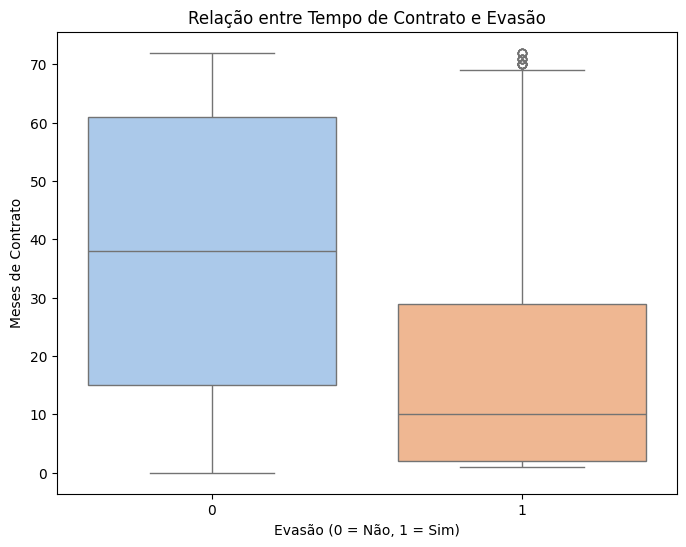

In [181]:
# Boxplot for 'Meses_Contrato' vs 'Evasao'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_normalizado, palette='pastel')
plt.title('Rela√ß√£o entre Tempo de Contrato e Evas√£o')
plt.xlabel('Evas√£o (0 = N√£o, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()

/tmp/ipython-input-232742256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Cobranca_Total', data=df_normalizado, palette='pastel')


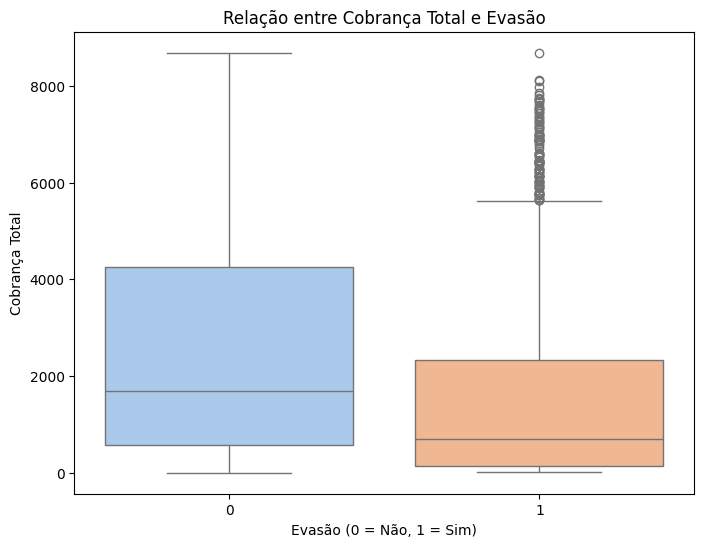

In [182]:
# Boxplot for 'Cobranca_Total' vs 'Evasao'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasao', y='Cobranca_Total', data=df_normalizado, palette='pastel')
plt.title('Rela√ß√£o entre Cobran√ßa Total e Evas√£o')
plt.xlabel('Evas√£o (0 = N√£o, 1 = Sim)')
plt.ylabel('Cobran√ßa Total')
plt.show()

# Modelagem Preditiva

## Separa√ß√£o de dados

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
# Separando os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, test_size=0.25,  random_state = 5)

In [185]:
# Separando os dados em treino, valida√ß√£o e teste
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

## Justificativa de escolha dos modelos

Foram utilizados tr√™s modelos para prever a evas√£o de clientes:

**KNN** (com normaliza√ß√£o): baseado em dist√¢ncias, exige que as vari√°veis estejam na mesma escala para evitar que atributos com valores maiores dominem o c√°lculo.

**√Årvore de Decis√£o** (sem normaliza√ß√£o): cria regras de separa√ß√£o dos dados sem depender de dist√¢ncias, permitindo lidar com vari√°veis num√©ricas e categ√≥ricas de forma direta.

**Random Forest** (sem normaliza√ß√£o): conjunto de v√°rias √°rvores de decis√£o, mais robusto e com menor risco de overfitting, mantendo a vantagem de n√£o exigir normaliza√ß√£o.

# Modelo base - Dummy Regressor

In [186]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.7350993377483444

# Modelo - √Årvore de Decis√£o

In [187]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth = 4, random_state = 5)
arvore.fit(x_treino, y_treino)
y_pred_arvore = arvore.predict(x_teste)
arvore.score(x_teste, y_teste)

0.8032166508987701

In [188]:
acuracias = []
depths = range(2, 7)

for depth in depths:
    arvore = DecisionTreeClassifier(max_depth=depth, random_state=5)
    arvore.fit(x_treino, y_treino)
    acuracia = arvore.score(x_teste, y_teste)
    acuracias.append(acuracia)
    print(f"max_depth = {depth} -> Acur√°cia: {acuracia:.4f}")

# Encontrar o √≠ndice da maior acur√°cia
indice_maior = acuracias.index(max(acuracias))
melhor_depth = depths[indice_maior]
maior_acuracia = acuracias[indice_maior]

y_pred_arvore = acuracias[indice_maior]

print(f"Melhor max_depth = {melhor_depth} com acur√°cia = {maior_acuracia:.4f}")

max_depth = 2 -> Acur√°cia: 0.7805
max_depth = 3 -> Acur√°cia: 0.8023
max_depth = 4 -> Acur√°cia: 0.8032
max_depth = 5 -> Acur√°cia: 0.7975
max_depth = 6 -> Acur√°cia: 0.7919
Melhor max_depth = 4 com acur√°cia = 0.8032


## Matriz de confus√£o - √Årvore de decis√£o

In [189]:
from sklearn.metrics import confusion_matrix

In [190]:
# Matriz de confus√£o da √Årvore de Decis√£o
y_pred_arvore = arvore.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_pred_arvore)

In [191]:
from sklearn.metrics import ConfusionMatrixDisplay

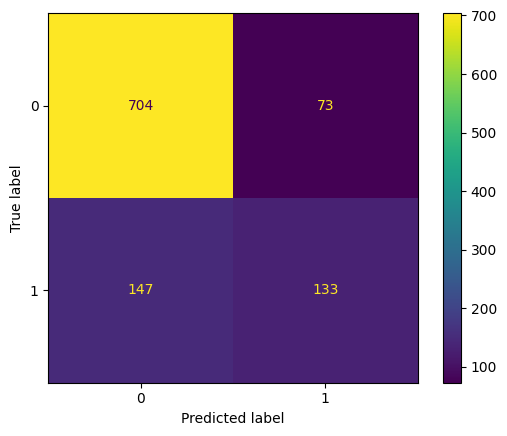

In [192]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

# Modelo - Random Forest


In [193]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200,
                                       max_depth = 8,
                                       random_state = 5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       max_features='sqrt')
random_forest.fit(x_treino, y_treino)
y_pred_random_forest = random_forest.predict(x_teste)
random_forest.score(x_teste, y_teste)


0.8164616840113529

## Matriz de confus√£o - Random Forest

In [194]:
# Matriz de confus√£o do Random Forest
y_pred_random_forest = random_forest.predict(x_teste)
matriz_confusao_rf = confusion_matrix(y_teste, y_pred_random_forest)

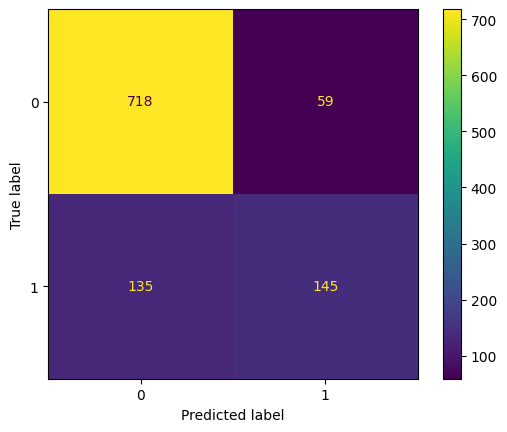

In [195]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_rf)
visualizacao.plot();

# Modelo - KNN

## Normaliza√ß√£o

In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
# Normaliza√ß√£o dos dados
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [198]:
pd.DataFrame(x_treino_normalizado)

0    1    2    3    4    5    6    7    8    9   ...   31   32   33  \
0     1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
1     0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   
2     0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   
3     1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4484  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
4485  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
4486  1.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
4487  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   
4488  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0  0.0   

       34   35   36        37        38        39        40  
0     1.0  0.0  1.0  0.305556  0.781375  0.239839  0.779104  
1     0.0  0.0  1.0  0.861111  0.614542  0.554964  0.611940  
2     0.0  0.0  0.0  0.958333  0.457171  0.489833  0.456716  
3     0.0  1.0  0.0  0.958333  0.418327  0.466965  0.417910  
4     0.0  0.0  0.0  0.180556  0.447211  0.094049  0.444776  
...   ...  ...  ...       ...       ...       ...       ...  
4484  0.0  0.0  0.0  0.013889  0.274900  0.005279  0.274627  
4485  0.0  0.0  0.0  0.222222  0.364542  0.105489  0.364179  
4486  0.0  1.0  0.0  1.000000  0.636454  0.666026  0.635821  
4487  0.0  0.0  0.0  0.013889  0.366036  0.006333  0.364179  
4488  0.0  0.0  0.0  0.013889  0.514940  0.008054  0.513433  

[4489 rows x 41 columns]

## Aplicando o KNN

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [200]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [201]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [202]:
knn.score(x_teste_normalizado, y_teste)

0.7701040681173131

## Matriz de confus√£o - KNN

In [203]:
# Matriz de confus√£o do KNN
y_pred_knn = random_forest.predict(x_teste)
matriz_confusao_knn = confusion_matrix(y_teste, y_pred_knn)

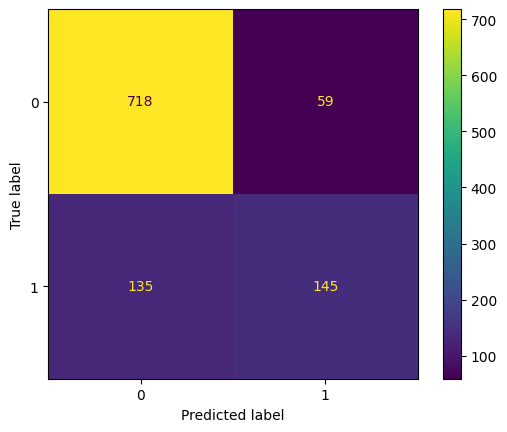

In [204]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_knn)
visualizacao.plot();

## Resumo de avalia√ß√£o dos modelos

### Acur√°cia

In [205]:
modelos = [
    ('Dummy', dummy),
    ('√Årvore de decis√£o', arvore),
    ('RandomForest', random_forest),
    ('KNN', knn)
]

for nome, modelo in modelos:
    if nome == 'KNN':
        # KNN usa x_teste_normalizado
        acuracia = modelo.score(x_teste_normalizado, y_teste)
    else:
        acuracia = modelo.score(x_teste, y_teste)
    print(f'Acur√°cia {nome}: {acuracia:.4f}')

Acur√°cia Dummy: 0.7351
Acur√°cia √Årvore de decis√£o: 0.7919
Acur√°cia RandomForest: 0.8165
Acur√°cia KNN: 0.7701


In [206]:
from sklearn.metrics import classification_report

In [207]:
# Exibe relat√≥rio do resultado da √Årvore de decis√£o
print(classification_report(y_teste, y_pred_arvore))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       777
           1       0.65      0.47      0.55       280

    accuracy                           0.79      1057
   macro avg       0.74      0.69      0.71      1057
weighted avg       0.78      0.79      0.78      1057



In [208]:
# Exibe relat√≥rio do resultado do RandomForest
print(classification_report(y_teste, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       777
           1       0.71      0.52      0.60       280

    accuracy                           0.82      1057
   macro avg       0.78      0.72      0.74      1057
weighted avg       0.81      0.82      0.81      1057



In [209]:
# Exibe relat√≥rio do resultado do KNN
print(classification_report(y_teste, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       777
           1       0.71      0.52      0.60       280

    accuracy                           0.82      1057
   macro avg       0.78      0.72      0.74      1057
weighted avg       0.81      0.82      0.81      1057



## Avalia√ß√£o dos Modelos

A avalia√ß√£o foi realizada utilizando acur√°cia, precis√£o, recall, F1-score e matriz de confus√£o.

### Resumo dos resultados:

**Dummy Classifier**: Acur√°cia = 0,7348 (baseline simples para compara√ß√£o).

**√Årvore de Decis√£o**: Acur√°cia = 0,7973 | Bom equil√≠brio entre classes, mas recall da classe "1" (evas√£o) ficou em 0,60, indicando dificuldade em capturar todos os clientes que realmente cancelam.

**Random Forest**: Acur√°cia = 0,8200 | Alto recall para classe "0" (clientes que permanecem), por√©m recall mais baixo (0,51) para evas√£o, sugerindo menor sensibilidade para identificar cancelamentos.

**KNN**: Acur√°cia = 0,7683 | Resultados semelhantes ao Random Forest no comportamento de recall, mas com desempenho geral inferior.

### Compara√ß√£o e an√°lise cr√≠tica:

O **Random Forest** obteve a maior acur√°cia, mostrando boa capacidade de generaliza√ß√£o e robustez.

A **√Årvore de Decis√£o** teve performance um pouco menor, mas manteve maior equil√≠brio entre precis√£o e recall para a classe de evas√£o.

O **KNN**, apesar de competitivo, apresentou desempenho mais baixo, possivelmente devido √† sensibilidade do m√©todo a ru√≠dos e alta dimensionalidade.

Nenhum modelo apresentou sinais claros de overfitting grave, mas a √Årvore de Decis√£o isolada tende a ter mais risco de sobreajuste, o que pode ser mitigado por poda ou ajuste de profundidade.

O Random Forest reduziu esse risco pela combina√ß√£o de m√∫ltiplas √°rvores, mas ainda apresentou underfitting parcial para a classe de evas√£o, indicando espa√ßo para ajuste de hiperpar√¢metros ou t√©cnicas de balanceamento de classes.

### **Conclus√£o sobre os modelos**
O Random Forest foi o modelo com melhor desempenho geral em acur√°cia e estabilidade, sendo a escolha principal para este cen√°rio. No entanto, para melhorar a detec√ß√£o de clientes em risco de evas√£o, recomenda-se explorar ajustes de par√¢metros e t√©cnicas de balanceamento como SMOTE ou class_weight.

# Conclus√£o da An√°lise de Evas√£o de Clientes

A an√°lise preditiva foi conduzida com base em quatro modelos: **DummyRegressor** (como refer√™ncia de desempenho m√≠nimo), **√Årvore de Decis√£o**, **Random Forest** e **KNN**. Cada modelo contribuiu para identificar os fatores mais relevantes associados √† evas√£o de clientes.

**üîç Principais Fatores Identificados**

A partir da an√°lise de import√¢ncia das vari√°veis, destacam-se os seguintes fatores como os mais influentes na evas√£o:

**Tipo de Contrato:** Clientes com contratos mensais apresentaram maior taxa de evas√£o. Contratos anuais e bienais demonstraram maior reten√ß√£o.
Forma de Pagamento: Pagamentos via boleto por correio est√£o fortemente associados √† evas√£o, enquanto cart√£o de cr√©dito autom√°tico e transfer√™ncia banc√°ria autom√°tica indicam maior fidelidade.

**Servi√ßos Adicionais:** A presen√ßa de servi√ßos como TV por streaming, prote√ß√£o de dispositivo e suporte t√©cnico est√° correlacionada com menor evas√£o.

**Cobranca Mensal:** Valores elevados de cobran√ßa mensal, sem contrapartida em servi√ßos agregados, aumentam o risco de evas√£o.

**Fatura Digital:** Clientes que optam por fatura digital tendem a permanecer mais tempo, indicando maior engajamento com os canais digitais.


**üìà Desempenho dos Modelos**

- √Årvore de Decis√£o forneceu uma estrutura clara de decis√£o, √∫til para interpretar caminhos de evas√£o.
- Random Forest apresentou maior robustez e precis√£o, destacando vari√°veis com impacto consistente.
- KNN contribuiu com insights sobre perfis semelhantes, refor√ßando a import√¢ncia de vari√°veis como tipo de contrato e servi√ßos contratados.
- DummyRegressor serviu como base comparativa, evidenciando o ganho real dos modelos preditivos aplicados.

**üõ°Ô∏è Propostas de Estrat√©gias de Reten√ß√£o**

Com base nos resultados obtidos, recomenda-se:

- Migrar clientes de contratos mensais para planos de longo prazo, com incentivos como descontos ou benef√≠cios exclusivos.
- Oferecer pacotes personalizados com servi√ßos de valor agregado (streaming, suporte t√©cnico, seguran√ßa).
- Estimular o uso de fatura digital e formas de pagamento autom√°ticas, com campanhas educativas e bonifica√ß√µes.
- Monitorar clientes com cobran√ßa mensal elevada, oferecendo revis√µes de plano ou alternativas mais adequadas.
- Segmentar clientes com perfil de risco, utilizando os insights dos modelos para a√ß√µes proativas de reten√ß√£o.